<a href="https://colab.research.google.com/github/SaPahlavani/Exercise.Vision/blob/main/2_Alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

کانال آلفا و تصاویر 4 کاناله

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("/content/drive/MyDrive/images/transparency.png", cv2.IMREAD_UNCHANGED)
img.shape

(600, 800, 4)

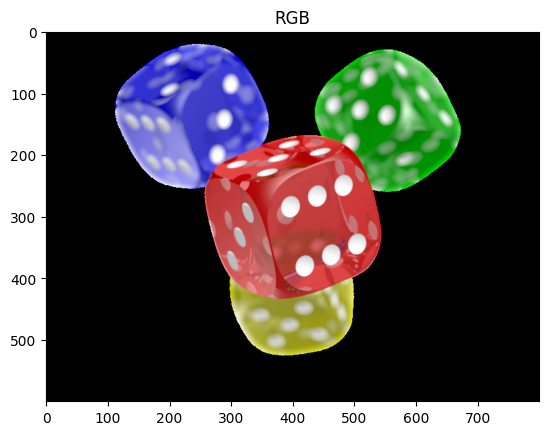

In [3]:
bgr_image = img[...,0:3]
alpha_image = img[...,-1]
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image); plt.title("RGB");

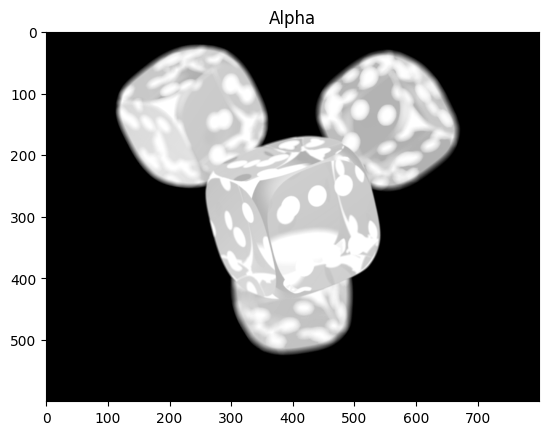

In [4]:
plt.imshow(alpha_image, cmap='gray'); plt.title("Alpha");

In [5]:
img = cv2.imread("/content/drive/MyDrive/images/alpha.png", cv2.IMREAD_UNCHANGED)
img.shape

(704, 1000, 4)

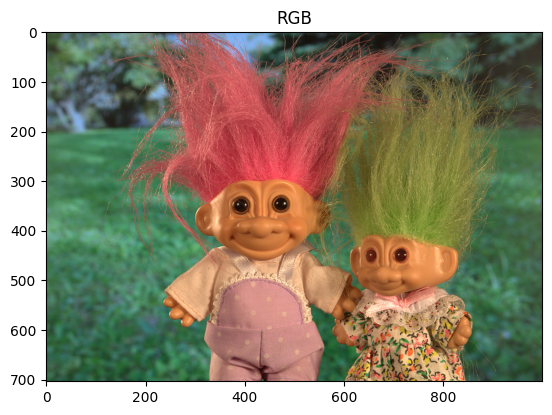

In [6]:
bgr_image = img[...,0:3]
alpha_image = img[...,-1]
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image); plt.title("RGB");

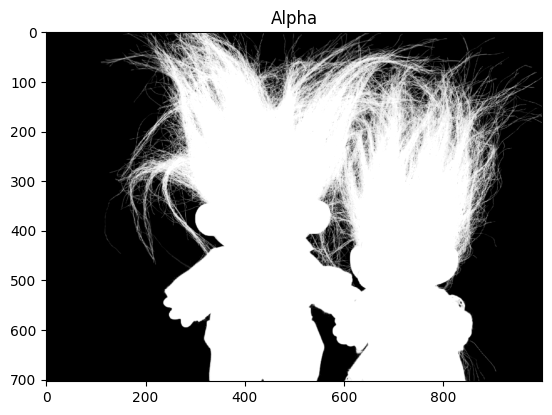

In [7]:
plt.imshow(alpha_image, cmap='gray'); plt.title("Alpha");

https://alphamatting.com/datasets.php

#06-bitwise-operations-and-masking

عملیات بیتی (Bitwise Operations) و نقاب‌گذاری تصویر (Masking)

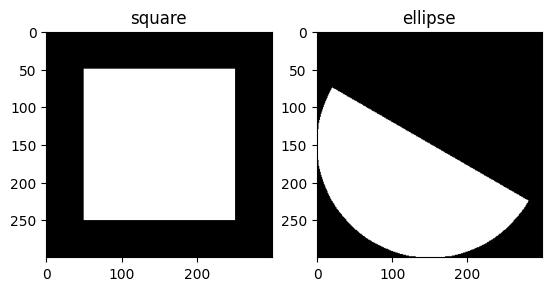

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# If you're wondering why only two dimensions, well this is a grayscale image,
# if we doing a colored image, we'd use
# rectangle = np.zeros((300, 300, 3),np.uint8)

# Making a sqare
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -1)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)

#show
plt.subplot(121);plt.imshow(square,cmap='gray');plt.title("square");
plt.subplot(122);plt.imshow(ellipse,cmap='gray');plt.title("ellipse");


عملیات بیتی تصویر در OpenCV

    bitwise_and
    bitwise_or
    bitwise_xor
    bitwise_not



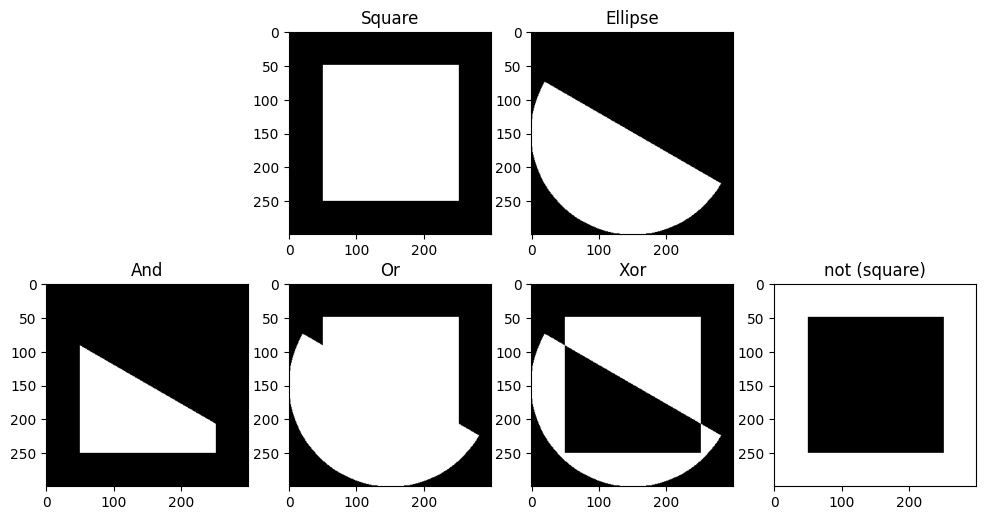

In [9]:
# Shows only where they intersect
bitwise_and = cv2.bitwise_and(square, ellipse)

# Shows where either square or ellipse is
bitwise_or = cv2.bitwise_or(square, ellipse)


# Shows where either exist by itself
bitwise_xor = cv2.bitwise_xor(square, ellipse)


# Shows everything that isn't part of the square
bitwise_not_sq = cv2.bitwise_not(square)

#show
plt.figure(figsize=[12,6])
plt.subplot(242);plt.imshow(square,cmap='gray');plt.title("Square");
plt.subplot(243);plt.imshow(ellipse,cmap='gray');plt.title("Ellipse");
plt.subplot(245);plt.imshow(bitwise_and,cmap='gray');plt.title("And");
plt.subplot(246);plt.imshow(bitwise_or,cmap='gray');plt.title("Or");
plt.subplot(247);plt.imshow(bitwise_xor,cmap='gray');plt.title("Xor");
plt.subplot(248);plt.imshow(bitwise_not_sq,cmap='gray');plt.title("not (square)");

مثال عملی با تصویر رنگی

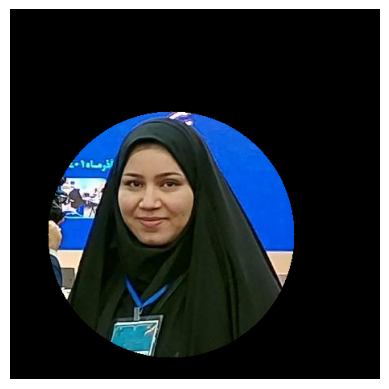

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/images/samaneh.jpg')

# Crop the image
#cropped = image[50:400, 50:400]
cropped = image
# Create a circular mask with the same size as cropped
circle = np.zeros_like(cropped)

# Define the center and radius
center = (200,280)  # مرکز دایره
radius = min(cropped.shape[:2]) // 3  # شعاع دایره

# Draw the circle
cv2.circle(circle, center, radius, (255, 255, 255), -1)

# Apply bitwise_and
output_image = cv2.bitwise_and(cropped, circle)

# Display the result
plt.imshow(output_image[..., ::-1])
plt.axis('off')
plt.show()


In [29]:
print(output_image.shape)

(460, 460, 3)


In [30]:
png_image = np.zeros((460,460,4), np.uint8)
png_image[:,:,0:3] = cropped
circle = np.zeros((460,460), np.uint8)
cv2.circle(circle, (250, 250), 250, (255,255,255), -1)
png_image[:,:,3]= circle
cv2.imwrite("samaneh_cr.png", png_image)

True

 برای درک عملگر بیتی دو تصویر به مثال زیر توجه کنید

In [31]:
square = np.zeros((10, 10), np.uint8)
cv2.rectangle(square, (2, 2), (8, 8), 2, -1) # 2 : 010

circle1 = np.zeros((10, 10), np.uint8)
cv2.circle(circle1, (5, 5), 2, 3, -1)  # 3 : 011


circle2 = np.zeros((10, 10), np.uint8)
cv2.circle(circle2, (5, 5), 2, 4, -1) # 4 : 100


output1 = cv2.bitwise_and(square, circle1)
output2 = cv2.bitwise_and(square, circle2)

print("--square--")
print(square)
print("--circle1--")
print(circle1)
print("--circle2--")
print(circle2)
print("--output1--")
print(output1)
print("--output2--")
print(output2)

--square--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 2 2 2 2 2 2 2 0]
 [0 0 0 0 0 0 0 0 0 0]]
--circle1--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 3 3 3 0 0 0]
 [0 0 0 3 3 3 3 3 0 0]
 [0 0 0 0 3 3 3 0 0 0]
 [0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--circle2--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 4 4 4 0 0 0]
 [0 0 0 4 4 4 4 4 0 0]
 [0 0 0 0 4 4 4 0 0 0]
 [0 0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--output1--
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 2 2 2 2 2 0 0]
 [0 0 0 0 2 2 2 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
--output2--
[[0 0 0 0 0 0 0 0



در تمرین اول، به جای اینکه محدوده‌ی چهره را Crop کنید (ببرید)، تصویر اصلی را با افزودن کانال آلفا به گونه ای ترنسپرنت کنید که فقط محدوده چهره مشخص باشد و مابقی در خروجی مشاهده نشود.

قاعدتا فرمت فایل خروجی باید png باشد. در صورت علاقه می‌توانید نواحی غیر چهره را با درجه‌ای کمتر ترنسپرنت کنید که به جای اینکه کاملا محو باشد کمرنگ‌تر یا شیشه‌ای دیده شود!


In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/drive/MyDrive/images/samaneh.jpg')

In [34]:
cropped = image
# Create a circular mask with the same size as cropped
circle = np.zeros_like(cropped)

In [35]:
print(circle)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [51]:
circle[0:460, 0:460] = [0, 0, 0]

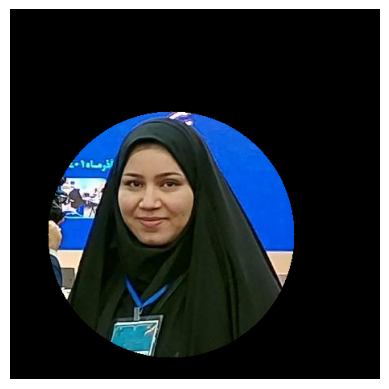

In [52]:
# Define the center and radius
center = (200,280)  # مرکز دایره
radius = min(cropped.shape[:2]) // 3  # شعاع دایره

# Draw the circle
cv2.circle(circle, center, radius, (255, 255, 255), -1)

# Apply bitwise_and
output_image = cv2.bitwise_and(cropped, circle)

# Display the result
plt.imshow(output_image[..., ::-1])
plt.axis('off')
plt.show()


In [53]:
print(output_image.shape)

(460, 460, 3)
